In [ ]:
# visualize support vectors of SVM classifier 
# https://www.machinecurve.com/index.php/2020/05/05/how-to-visualize-support-vectors-of-your-svm-classifier/

In [1]:
%cd "C:\Users\jwill\Documents\Machine Learning\Data"

C:\Users\jwill\Documents\Machine Learning\Data


C:\Users\jwill\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


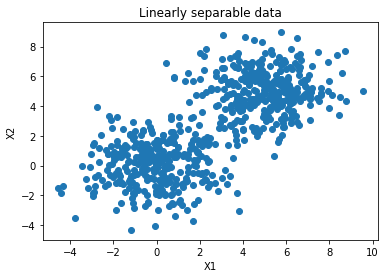

In [2]:
# Imports
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1.5
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 1000

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)

# Save and load temporarily
np.save('./datasv.npy', (X_train, X_test, y_train, y_test))
X_train, X_test, y_train, y_test = np.load('./datasv.npy', allow_pickle=True)

# Generate scatter plot for training data 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X_train, y_train)

In [3]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

[  0  80 157 207 294 321 373 380 397 400 440 515 590  52  67  88 120 341
 409 470 471 491 497 517 527 640]


In [4]:
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[13 13]


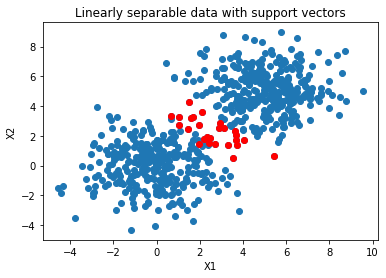

In [5]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()